In [11]:
from PIL import Image

def combine_2x2(
    img_paths,
    save_path="categorical_distributions.png",
    resize_to=None
):
    """
    Combine four images into a 2x2 grid and save as a single figure.

    Parameters
    ----------
    img_paths : list of str
        A list containing exactly four image file paths.
        The order should be:
        [top-left, top-right, bottom-left, bottom-right]

    save_path : str
        Output path for the combined image.

    resize_to : tuple or None
        If provided (e.g., (800, 800)), each image will be resized to this
        dimension before merging. This is recommended to ensure uniform layout.
        If None, the original image sizes will be used.
    """

    # Check number of input images
    if len(img_paths) != 4:
        raise ValueError("Exactly four images are required to create a 2x2 grid.")

    # Open each image
    imgs = [Image.open(p) for p in img_paths]

    # Resize images if requested (recommended for cleaner alignment)
    if resize_to is not None:
        imgs = [img.resize(resize_to, Image.LANCZOS) for img in imgs]

    # Use the size of the first image as reference
    w, h = imgs[0].size

    # Create a blank canvas for a 2×2 grid (total size = 2w × 2h)
    combined = Image.new('RGB', (2 * w, 2 * h), color=(255, 255, 255))

    # Paste images in the specified layout:
    # 0: top-left, 1: top-right, 2: bottom-left, 3: bottom-right
    combined.paste(imgs[0], (0, 0))
    combined.paste(imgs[1], (w, 0))
    combined.paste(imgs[2], (0, h))
    combined.paste(imgs[3], (w, h))

    # Save the final merged image
    combined.save(save_path, dpi=(300, 300))
    print(f"Combined image saved as: {save_path}")


# ===== Example usage =====
img_paths = [
    "gender.png",      # top-left
    "married.png",     # top-right
    "dependents.png",  # bottom-left
    "education.png"    # bottom-right
]

combine_2x2(
    img_paths,
    save_path="categorical_distributions.png",
    resize_to=(800, 800)  # Adjust or set to None if resizing is not needed
)


Combined image saved as: categorical_distributions.png


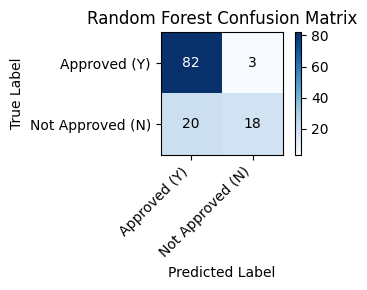

In [12]:

import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, title, save_path=None):
    """
    Plot a confusion matrix heatmap for the Random Forest classifier.
    """
    cm = np.array(cm)

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=12)
    plt.colorbar()

    classes = ['Approved (Y)', 'Not Approved (N)']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    # Write values inside squares
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()


# Your Random Forest confusion matrix
rf_cm = [
    [82, 3],
    [20, 18]
]

plot_confusion_matrix(
    rf_cm,
    title="Random Forest Confusion Matrix",
    save_path="confusion_matrix_rf.png"
)


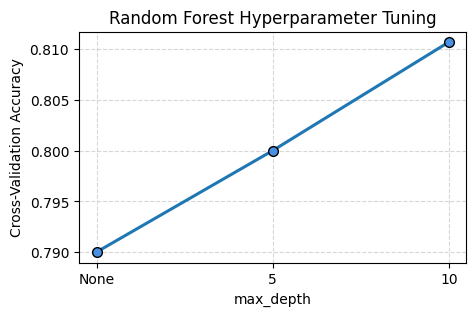

In [13]:
import matplotlib.pyplot as plt

def plot_rf_tuning(max_depth_list, cv_scores, save_path=None):
    # Convert None → 'None' for labeling
    x_labels = ['None' if d is None else str(d) for d in max_depth_list]

    plt.figure(figsize=(5, 3))


    plt.plot(
        x_labels,
        cv_scores,
        marker='o',
        linewidth=2.2,
        color='#1f77b4',
        markerfacecolor='#4a90e2',  
        markeredgecolor='black',
        markersize=7
    )

    plt.xlabel('max_depth')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('Random Forest Hyperparameter Tuning')
    plt.grid(True, linestyle='--', alpha=0.5)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    

# Example values (you can replace with your own if you computed them)
max_depth_values = [None, 5, 10]
cv_accuracy_scores = [0.79, 0.80, 0.8107]   # Replace with your real numbers if available

plot_rf_tuning(
    max_depth_values,
    cv_accuracy_scores,
    save_path="rf_tuning_curve.png"
)


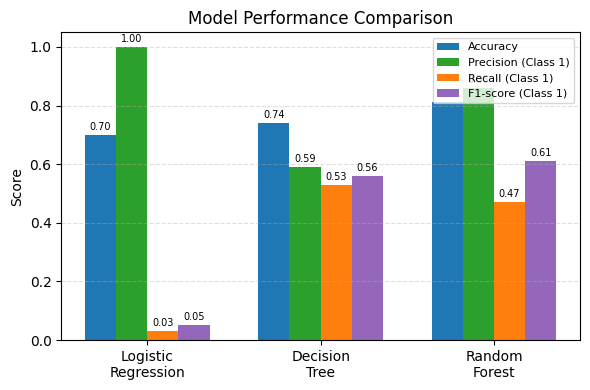

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(save_path=None):
    """
    Plot comparison of model performance metrics for three classifiers.

    Metrics used:
    - Accuracy
    - Precision (Class 1: Not Approved)
    - Recall (Class 1)
    - F1-score (Class 1)
    """

    
    models = ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest']

    
    accuracy =  [0.6992, 0.7398, 0.8130]
    precision = [1.00,   0.59,   0.86  ]
    recall =    [0.03,   0.53,   0.47  ]
    f1_score =  [0.05,   0.56,   0.61  ]

    x = np.arange(len(models)) 
    width = 0.18

    plt.figure(figsize=(6, 4))


    bars1 = plt.bar(x - 1.5*width, accuracy,  width, label='Accuracy',  color='#1f77b4')
    bars2 = plt.bar(x - 0.5*width, precision, width, label='Precision (Class 1)', color='#2ca02c')
    bars3 = plt.bar(x + 0.5*width, recall,    width, label='Recall (Class 1)',    color='#ff7f0e')
    bars4 = plt.bar(x + 1.5*width, f1_score,  width, label='F1-score (Class 1)',  color='#9467bd')

    plt.xticks(x, models)
    plt.ylabel('Score')
    plt.ylim(0, 1.05)
    plt.title('Model Performance Comparison')

    plt.legend(loc='upper right', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.,
                height + 0.01,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=7
            )

    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)
    autolabel(bars4)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()



plot_model_performance(save_path="model_performance_comparison.png")
